In [1]:
import pandas as pd
from pytrends.request import TrendReq
import json
import matplotlib.pyplot as plt

In [2]:
#connect to Google
pytrend = TrendReq(hl='en-US', tz=360)

In [6]:
#build payload
#key-word-> it's up to 5 terms(related key words)
etf = ['DIA','SPY','QQQ','IVV',
       'XLI','XLV','XLK','XLE','XLF', #spdr sector
       'IYW','IYF','IYE','IYH',#'IYJ''IYC','IYZ','RTH',, # ishares sector
       'IHE','IBB','SMH','XLB','XLP','XLY']
for i in etf:
    pytrend.build_payload(kw_list=[i+' ETF'], cat=0, timeframe='today 5-y', geo='', gprop='')
    if etf.index(i) == 0: #first one
        df = pytrend.interest_over_time() #return dataframe
        #time.sleep(randint(5, 10))
    else:
        df1 = pytrend.interest_over_time()
        df = df.merge(df1[i+' ETF'], on='date')
df.tail() #isPartial is mostly 'False', so ignore here

,DIA ETF,isPartial,SPY ETF,QQQ ETF,IVV ETF,XLI ETF,XLV ETF,XLK ETF,XLE ETF,XLF ETF,IYW ETF,IYF ETF,IYE ETF,IYH ETF,IHE ETF,IBB ETF,SMH ETF,XLB ETF,XLP ETF,XLY ETF
date,,,,,,,,,,,,,,,,,,,,
2019-04-28,27,False,20,62,76,55,28,49,8,13,33,42,0,0,44,38,40,21,16,35
2019-05-05,32,False,35,50,80,18,21,34,10,20,0,0,0,0,0,21,20,0,0,34
2019-05-12,22,False,38,68,61,18,21,34,10,17,49,0,0,0,0,25,60,43,32,21
2019-05-19,22,False,23,65,50,0,41,48,18,23,64,0,0,38,0,17,20,21,48,20
2019-05-26,17,False,30,59,35,18,0,24,10,13,0,0,0,0,0,8,59,0,24,20


In [7]:
#spy = pytrend.interest_over_time().get('SPY')

In [8]:
#set plot type
plt.rcParams['figure.figsize'] = (15, 5)
font = {'family': 'Segoe Script', 'weight': 'normal', 'size': 15}
plt.rc('font',**font)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.unicode_minus']=False #show minus

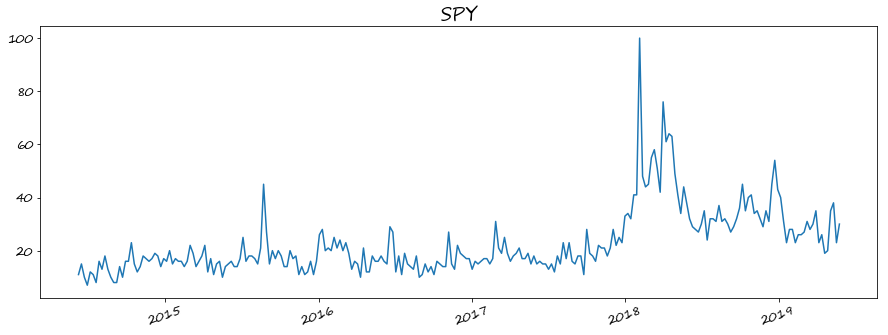

In [9]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.title('SPY')
plt.xticks(rotation=20)
plt.plot(df['SPY ETF'])

In [10]:
pytrend.interest_by_region()

,XLY ETF
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


In [11]:
pytrend.related_topics()
pytrend.suggestions('QQQ')

[{'mid': '/m/06z_zz', 'title': 'PowerShares QQQ 300', 'type': 'Topic'}]

In [12]:
preload = json.loads(pytrend.interest_over_time().to_json(orient='table'))['data']
print(json.dumps(preload, ensure_ascii=False))

[{"date": "2014-06-08T00:00:00.000Z", "XLY ETF": 30, "isPartial": false}, {"date": "2014-06-15T00:00:00.000Z", "XLY ETF": 30, "isPartial": false}, {"date": "2014-06-22T00:00:00.000Z", "XLY ETF": 30, "isPartial": false}, {"date": "2014-06-29T00:00:00.000Z", "XLY ETF": 61, "isPartial": false}, {"date": "2014-07-06T00:00:00.000Z", "XLY ETF": 30, "isPartial": false}, {"date": "2014-07-13T00:00:00.000Z", "XLY ETF": 30, "isPartial": false}, {"date": "2014-07-20T00:00:00.000Z", "XLY ETF": 0, "isPartial": false}, {"date": "2014-07-27T00:00:00.000Z", "XLY ETF": 30, "isPartial": false}, {"date": "2014-08-03T00:00:00.000Z", "XLY ETF": 0, "isPartial": false}, {"date": "2014-08-10T00:00:00.000Z", "XLY ETF": 30, "isPartial": false}, {"date": "2014-08-17T00:00:00.000Z", "XLY ETF": 0, "isPartial": false}, {"date": "2014-08-24T00:00:00.000Z", "XLY ETF": 29, "isPartial": false}, {"date": "2014-08-31T00:00:00.000Z", "XLY ETF": 28, "isPartial": false}, {"date": "2014-09-07T00:00:00.000Z", "XLY ETF": 56, "

In [13]:
df.to_excel('google_trend.xlsx')

[pytrend.Pypl](https://pypi.org/project/pytrends/)  
[USING GOOGLE TRENDS TO PREDICT APPLE STOCK RETURNS](https://www.mattmoocar.me/AppleStockPred/)  
[Google-Trends-Categories](https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)  
[results-of-pytrends](https://stackoverflow.com/questions/48246083/how-do-i-work-with-the-results-of-pytrends)  
[指數型商品(ETF)代碼總整理](https://www.businessweekly.com.tw/article.aspx?id=8945&type=Blog)  